<a href="https://colab.research.google.com/github/PAVAN143258/YBI_PROJECTS/blob/main/Project_1_Linear_vs_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear vs Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/MPG.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
data.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
data.dropna(inplace=True)

In [6]:
data["model_year"]=pd.to_datetime(data["model_year"],format="%y")

In [7]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [8]:
data["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [9]:
data.replace({"origin": {"usa":0,"japan":1,"europe":2}},inplace=True)

In [10]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

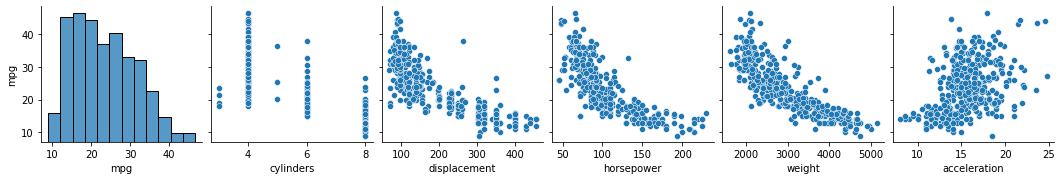

In [11]:
sns.pairplot(data,x_vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration'],y_vars=["mpg"])

In [12]:
y=data["mpg"]
x=data[["horsepower","weight"]]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF Features"] = x.columns
vif.round(1)

,VIF Factor,VIF Features
0,32.2,horsepower
1,32.2,weight


## Spliting

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=2529)
#Shape of train test 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((117, 2), (275, 2), (117,), (275,))

## Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(X_test)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
lr.intercept_

23.311111111111114

In [25]:
lr.coef_

array([-1.31018154, -5.46982268])

In [26]:
y_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mean_absolute_percentage_error(y_test,y_pred)

849.8860237474898

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


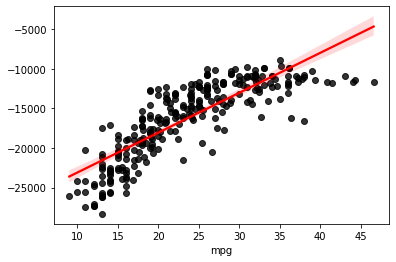

In [28]:
sns.regplot(y_test,y_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

## Statistical Data Exploration

In [31]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          3.06e-104
Time:                        17:54:00   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_train2 = pd.DataFrame(X_train2, columns = ['bais','horsepower','weight','square of horsepower','horsepower*weight','square of weight'])
X_train2.head()

,bais,horsepower,weight,square of horsepower,horsepower*weight,square of weight
0,1.0,0.028502,0.398924,0.000812,0.011370,0.159141
1,1.0,0.028502,0.527865,0.000812,0.015045,0.278642
2,1.0,0.956436,1.237040,0.914770,1.183149,1.530268
3,1.0,-0.812438,0.164155,0.660055,-0.133365,0.026947
4,1.0,0.753450,1.027815,0.567688,0.774408,1.056404


In [33]:
X_test2 = poly.fit_transform(X_test)
X_test2 = pd.DataFrame(X_test2, columns = ['bais','horsepower','weight','square of horsepower','horsepower*weight','square of weight'])
lr.fit(X_train2,y_train)

LinearRegression()

In [34]:
lr.intercept_

21.771986191852616

In [35]:
lr.coef_

array([ 0.        , -3.19867466, -4.59881471,  0.34486872,  1.50577904,
       -0.11598929])

Model Accuracy

In [40]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
pred2 = lr.predict(X_test2)
mean_absolute_percentage_error(y_test,pred2)

0.12211723757818706

In [38]:
r2_score(y_test,pred2)

0.7402246274360372

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


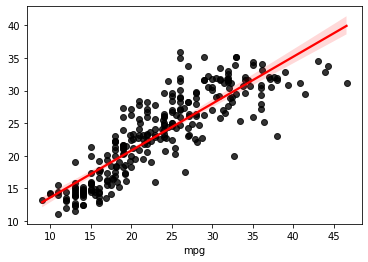

In [39]:
sns.regplot(y_test,pred2,scatter_kws={"color": "black"}, line_kws={"color": "red"})